# MaskRCNN Object Detection Gradio App

In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model = model.eval().cuda()

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


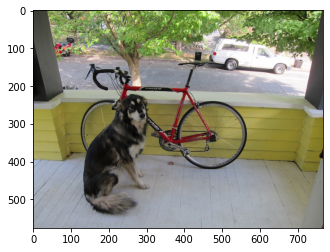

In [ ]:
IMAGE_URL = 'https://raw.githubusercontent.com/tugstugi/dl-colab-notebooks/master/resources/dog.jpg'

image_file = basename(IMAGE_URL)
!wget -q -O {image_file} {IMAGE_URL}
plt.imshow(matplotlib.image.imread(image_file))

In [ ]:
t = time.time()
image = PIL.Image.open(image_file)
image_tensor = torchvision.transforms.functional.to_tensor(image).cuda()
output = model([image_tensor])[0]
print('executed in %.3fs' % (time.time() - t))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


executed in 0.700s


/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


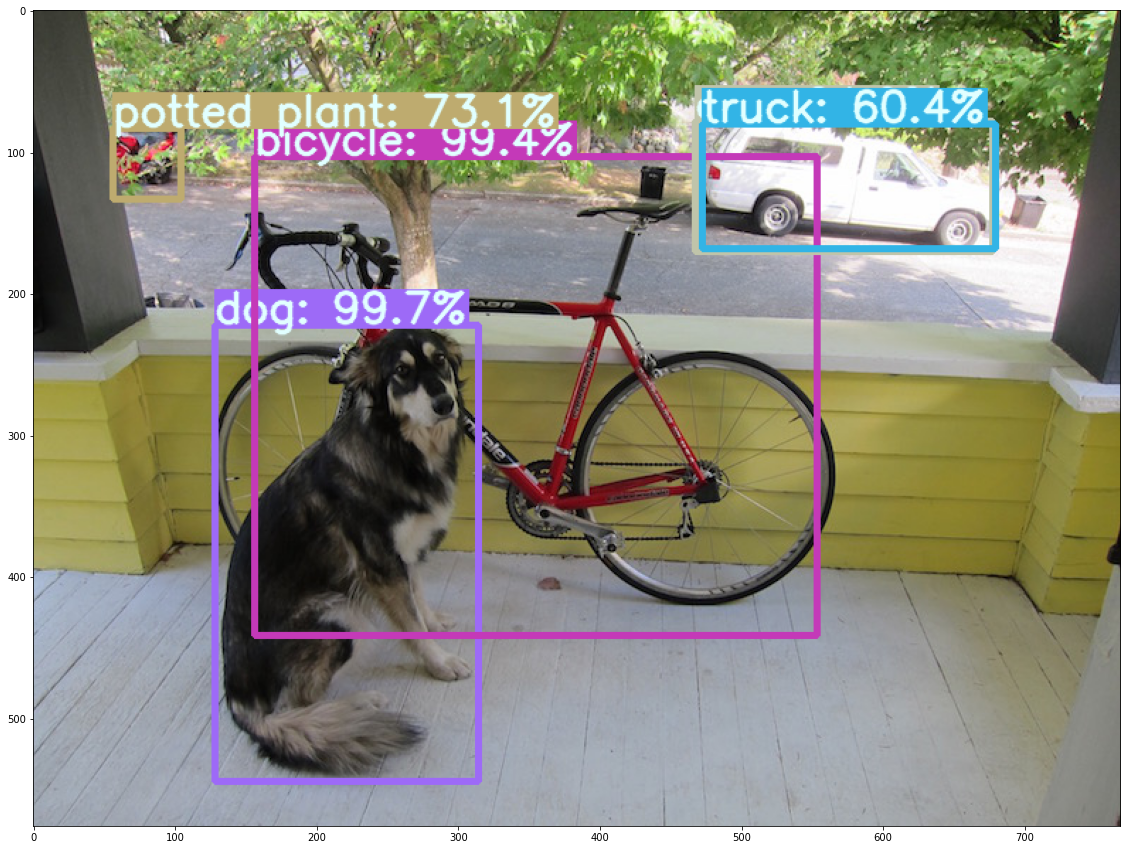

In [ ]:
coco_names = ['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
colors = [[random.randint(0, 255) for _ in range(3)] for _ in coco_names]

result_image = np.array(image.copy())
for box, label, score in zip(output['boxes'], output['labels'], output['scores']):
  if score > 0.5:
    color = random.choice(colors)
    
    # draw box
    tl = round(0.002 * max(result_image.shape[0:2])) + 1  # line thickness
    c1, c2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
    cv2.rectangle(result_image, c1, c2, color, thickness=tl)
    # draw text
    display_txt = "%s: %.1f%%" % (coco_names[label], 100*score)
    tf = max(tl - 1, 1)  # font thickness
    t_size = cv2.getTextSize(display_txt, 0, fontScale=tl / 3, thickness=tf)[0]
    c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
    cv2.rectangle(result_image, c1, c2, color, -1)  # filled
    cv2.putText(result_image, display_txt, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
  
plt.figure(figsize=(20, 15))
plt.imshow(result_image)

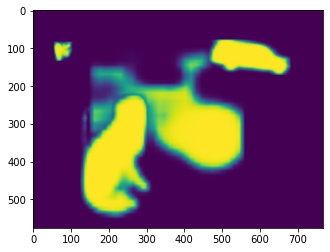

In [ ]:
masks = None
for score, mask in zip(output['scores'], output['masks']):
  if score > 0.5:
    if masks is None:
      masks = mask
    else:
      masks = torch.max(masks, mask)

plt.imshow(masks.squeeze(0).cpu().numpy())

---

In [ ]:
def func(image):
  
  image_tensor = torchvision.transforms.functional.to_tensor(image).cuda()
  output = model([image_tensor])[0]
  coco_names = ['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
  colors = [[random.randint(0, 255) for _ in range(3)] for _ in coco_names]

  result_image = np.array(image.copy())
  for box, label, score in zip(output['boxes'], output['labels'], output['scores']):
    if score > 0.5:
      color = random.choice(colors)
      
      # draw box
      tl = round(0.002 * max(result_image.shape[0:2])) + 1  # line thickness
      c1, c2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
      cv2.rectangle(result_image, c1, c2, color, thickness=tl)
      # draw text
      display_txt = "%s: %.1f%%" % (coco_names[label], 100*score)
      tf = max(tl - 1, 1)  # font thickness
      t_size = cv2.getTextSize(display_txt, 0, fontScale=tl / 3, thickness=tf)[0]
      c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
      cv2.rectangle(result_image, c1, c2, color, -1)  # filled
      cv2.putText(result_image, display_txt, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
    
  return result_image

In [ ]:
xx = func(PIL.Image.open(image_file))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [ ]:
! pip install -q gradio
import gradio as gr

     |████████████████████████████████| 1.4MB 8.1MB/s 
     |████████████████████████████████| 215kB 45.6MB/s 
     |████████████████████████████████| 2.7MB 47.9MB/s 
     |████████████████████████████████| 962kB 60.6MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 


In [ ]:
input = gr.inputs.Image()
output = gr.outputs.Image()

In [ ]:
gr.Interface(fn=func, inputs=input, outputs=output).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on External URL: https://57384.gradio.app
Interface loading below...


(<gradio.networking.serve_files_in_background.<locals>.HTTPServer at 0x7f5f301196d8>,
 'http://127.0.0.1:7860/',
 'https://57384.gradio.app')

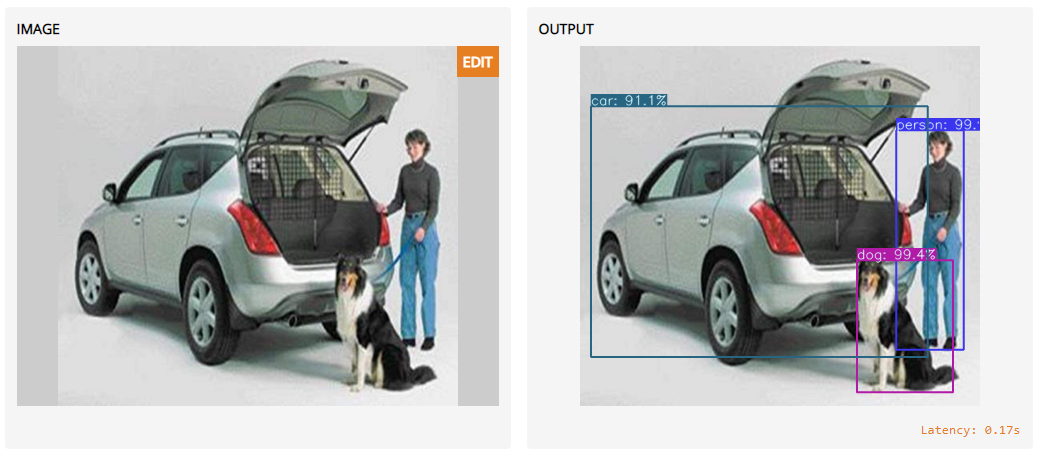